# Proyecto Inteligencia Artificial
## 3er PAC 2025

### Alumnos:
- Rolando Josué Mejía Alemán
- Jose Angel Amaya Nataren
- Jorge Arturo Canales Ortega

### Descripción:
Desarrollo de un modelo de red neuronal diseñado para clasificar imágenes en dos categorías: feliz y triste.

### Dataset:
**Entrenamiento**: [EMODeCode 2000](https://www.kaggle.com/competitions/emodecode-2000)

**Test**: [FER-2013](https://www.kaggle.com/datasets/msambare/fer2013)


# Requisitos

In [220]:
# pip list && python --version

In [221]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib pandas
%pip install opencv-python
%pip list

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Usuario\AppData\Local\Temp\pip-install-tcfod0cg\tensorflow-gpu_e7305a3cd44c4eb597ae02e3a113f03f\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not bu

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.9
decorator                    5.1.1
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.55.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.1
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.30.0
jedi                         0.19.2
joblib                       1.4.2
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.7.0



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [222]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [223]:
# Opcional

In [224]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Exploración De Datos

In [225]:
data_dir = 'data' 

In [226]:
os.listdir(data_dir)

['happy', 'sad']

In [227]:
os.listdir(data_dir)
os.listdir(os.path.join(data_dir, 'happy'))

img = cv2.imread(os.path.join('data', 'happy', '7.jpg'))
img.shape

(48, 48, 3)

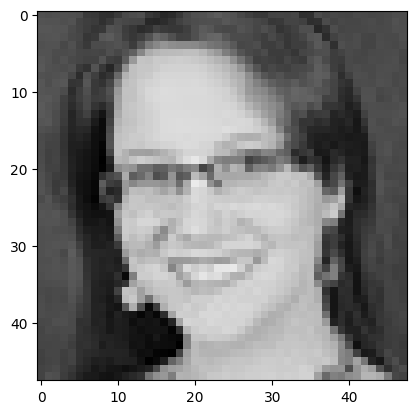

In [228]:
img = cv2.imread('data/happy/7.jpg')
plt.imshow(img)
plt.show()

In [229]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

#  Limpieza De Datos

In [230]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Cargando Datos

In [231]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=(48, 48),
    batch_size=64 
)

Found 12102 files belonging to 2 classes.


In [232]:
len(os.listdir('data/happy'))

7164

In [233]:
len(os.listdir('data/sad'))

4938

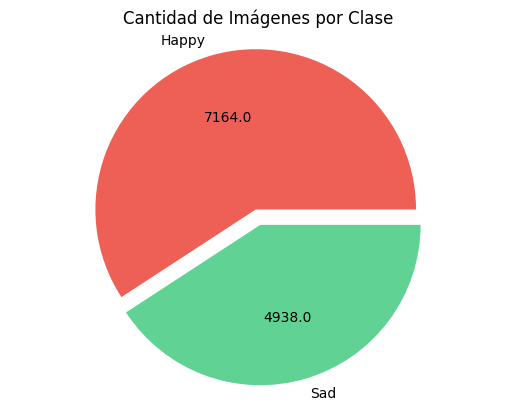

In [234]:
clases = ['Happy', 'Sad'] 
cantidades = [len(os.listdir('data/happy')), len(os.listdir('data/sad'))]
colores = ["#EE6055", "#60D394"] 

indice_max = cantidades.index(max(cantidades)) 
desfase = [0] * len(cantidades) 
desfase[indice_max] = 0.1

plt.pie(cantidades, labels=clases, autopct=lambda p: f'{p * sum(cantidades) / 100:.1f}', colors=colores, explode=desfase) 
plt.axis("equal") 
plt.title("Cantidad de Imágenes por Clase") 
plt.show()

# Preparación De Datos

In [235]:
for images, labels in data.take(1):
    print(images.shape)

(64, 48, 48, 3)


In [236]:
file_paths = data.file_paths[:5]
for i, file_path in enumerate(file_paths): 
    print(f"Img {i+1}: {os.path.basename(file_path)}")

Img 1: 352.jpg
Img 2: 12563.jpg
Img 3: 14588.jpg
Img 4: 2980.jpg
Img 5: 15908.jpg


In [237]:
for epoch in range(3):
    print(f"Epoch {epoch+1}") 
    for images, labels in data.take(1): 
        for i in range(5): print(f"Img {i+1} - Clase: {labels[i].numpy()}") 
    print("\n")

Epoch 1
Img 1 - Clase: 1
Img 2 - Clase: 0
Img 3 - Clase: 0
Img 4 - Clase: 0
Img 5 - Clase: 1


Epoch 2
Img 1 - Clase: 1
Img 2 - Clase: 1
Img 3 - Clase: 1
Img 4 - Clase: 1
Img 5 - Clase: 1


Epoch 3
Img 1 - Clase: 0
Img 2 - Clase: 0
Img 3 - Clase: 0
Img 4 - Clase: 1
Img 5 - Clase: 1




In [238]:
data_iterator = data.as_numpy_iterator()

In [292]:
batch = data_iterator.next()
batch[1]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
      dtype=int32)

In [240]:
batch[0].shape

(64, 48, 48, 3)

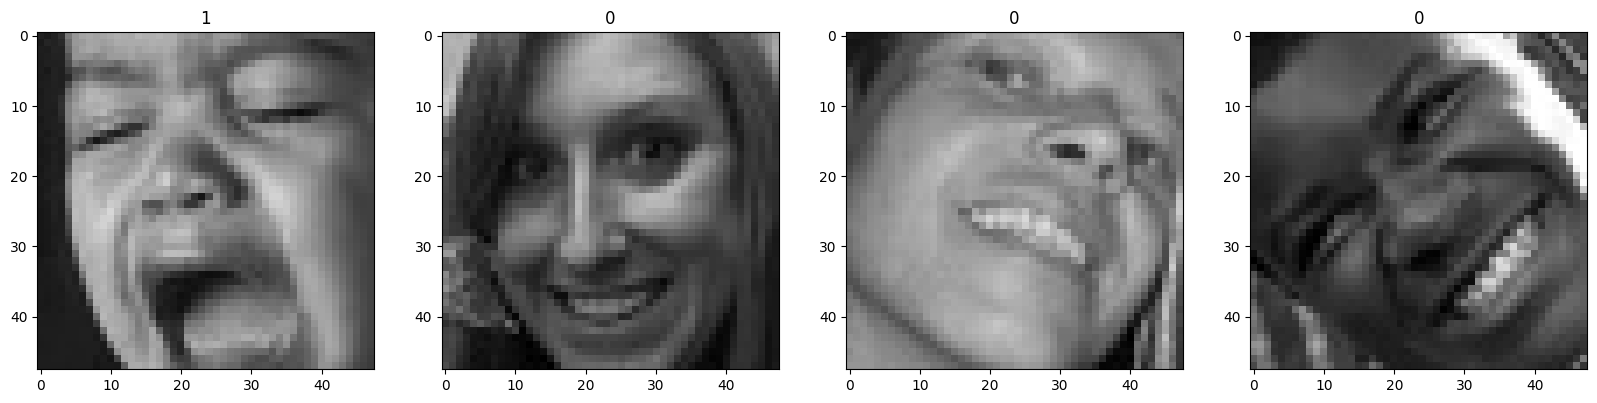

In [293]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Clase 0 = Happy    |    Clase 1 = Sad

# Escalado De Datos

In [1010]:
data.element_spec

(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [1011]:
data = data.map(lambda x,y: (x/255, y))

In [1012]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [1013]:
data.element_spec

(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [1014]:
data.as_numpy_iterator().next()

(array([[[[0.29803923, 0.29803923, 0.29803923],
          [0.3529412 , 0.3529412 , 0.3529412 ],
          [0.34117648, 0.34117648, 0.34117648],
          ...,
          [0.56078434, 0.56078434, 0.56078434],
          [0.6       , 0.6       , 0.6       ],
          [0.6       , 0.6       , 0.6       ]],
 
         [[0.24705882, 0.24705882, 0.24705882],
          [0.30980393, 0.30980393, 0.30980393],
          [0.3529412 , 0.3529412 , 0.3529412 ],
          ...,
          [0.5647059 , 0.5647059 , 0.5647059 ],
          [0.5686275 , 0.5686275 , 0.5686275 ],
          [0.5921569 , 0.5921569 , 0.5921569 ]],
 
         [[0.30980393, 0.30980393, 0.30980393],
          [0.27450982, 0.27450982, 0.27450982],
          [0.36078432, 0.36078432, 0.36078432],
          ...,
          [0.58431375, 0.58431375, 0.58431375],
          [0.56078434, 0.56078434, 0.56078434],
          [0.5529412 , 0.5529412 , 0.5529412 ]],
 
         ...,
 
         [[0.6117647 , 0.6117647 , 0.6117647 ],
          [0.59215

# Division De Datos (Entrenamiento - Validación)

In [1087]:
len(data)

190

In [1016]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [1088]:
print(f'Entrenamiento: {train_size} ||  Test: {test_size}  ||  Validación:{val_size}')

Entrenamiento: 133 ||  Test: 19  ||  Validación:38


In [1018]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Modelo

In [1019]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
model = Sequential()

In [ ]:
"""# Modelo Prueba

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  # Dropout
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

"""

"# 6. Build Deep Learning Model (modificado con más Dropout)\n\nmodel.add(Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 3)))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25))  # Dropout\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.5))  # Dropout\nmodel.add(Dense(1, activation='sigmoid'))  # Capa de salida\n\n"

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,3)),
    MaxPooling2D(),
    Dropout(0.15),
    
    Conv2D(48, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.1),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.1),
    
    Flatten(),
    
    Dense(384, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Valores después de la convolución:
[
  [1.2  -0.5  0.8]
  [-0.3  2.1  0.4]
  [0.6   1.5  1.1]
]

Después de ReLU:
[
  [1.2  0.0  0.8]
  [0.0  2.1  0.4]
  [0.6  1.5  1.1]
]

Después de MaxPooling:
[
  [2.1  0.8]
  [1.5  1.1]
]

In [ ]:
""" #Modelo Prueba #2

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))"""

"model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(48,48,3)))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(32, (3,3), 1, activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(16, (3,3), 1, activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Flatten())\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1, activation='sigmoid'))"

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927,985 (3.54 MB)

 Trainable params: 927,985 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

# Entreno

In [1027]:
logdir='logs'

In [1028]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [1029]:
hist = model.fit(train, epochs=13, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.5731 - loss: 0.6920 - val_accuracy: 0.6497 - val_loss: 0.6340
Epoch 2/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6409 - loss: 0.6322 - val_accuracy: 0.7072 - val_loss: 0.5667
Epoch 3/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7280 - loss: 0.5415 - val_accuracy: 0.7780 - val_loss: 0.4760
Epoch 4/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.7667 - loss: 0.4780 - val_accuracy: 0.8030 - val_loss: 0.4310
Epoch 5/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.7875 - loss: 0.4298 - val_accuracy: 0.8277 - val_loss: 0.3751
Epoch 6/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.8092 - loss: 0.4006 - val_accuracy: 0.8322 - val_loss: 0.3706
Epoch 7/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.8229 - loss: 0.3793 - val_accuracy: 0.8483 - val_loss: 0.3492
Epoch 8/13
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8381 - loss: 0.3538 - val_a

In [ ]:
# Batch = 64    Data = 12102
# CantBatches = Batch / Data = 190
# Epoch = 13  
# Actualizaciones = Cantbatches * Epoch = 2,470 

# Rendimiento

In [1030]:
hist.history

{'accuracy': [0.5912829041481018,
  0.6684680581092834,
  0.7413063645362854,
  0.7732612490653992,
  0.7904135584831238,
  0.8109727501869202,
  0.8246005773544312,
  0.8422227501869202,
  0.8552631735801697,
  0.8639567494392395,
  0.8740601539611816,
  0.8861607313156128,
  0.8950892686843872],
 'loss': [0.6743834614753723,
  0.6034873723983765,
  0.5219405293464661,
  0.46788835525512695,
  0.4300330877304077,
  0.4023628532886505,
  0.380021870136261,
  0.3502498269081116,
  0.33043691515922546,
  0.3030034303665161,
  0.28449001908302307,
  0.267213374376297,
  0.24720090627670288],
 'val_accuracy': [0.6496710777282715,
  0.7072368264198303,
  0.7779605388641357,
  0.8030427694320679,
  0.8277137875556946,
  0.8322368264198303,
  0.8482730388641357,
  0.8462170958518982,
  0.8585526347160339,
  0.8544408082962036,
  0.8655427694320679,
  0.8778783082962036,
  0.8585526347160339],
 'val_loss': [0.6339910626411438,
  0.5666679739952087,
  0.47596022486686707,
  0.43101048469543457,

In [1031]:
history_ = pd.DataFrame(hist.history)
history_

,accuracy,loss,val_accuracy,val_loss
0,0.591283,0.674383,0.649671,0.633991
1,0.668468,0.603487,0.707237,0.566668
2,0.741306,0.521941,0.777961,0.475960
3,0.773261,0.467888,0.803043,0.431010
4,0.790414,0.430033,0.827714,0.375102
5,0.810973,0.402363,0.832237,0.370641
6,0.824601,0.380022,0.848273,0.349211
7,0.842223,0.350250,0.846217,0.348871
8,0.855263,0.330437,0.858553,0.320763
9,0.863957,0.303003,0.854441,0.323895


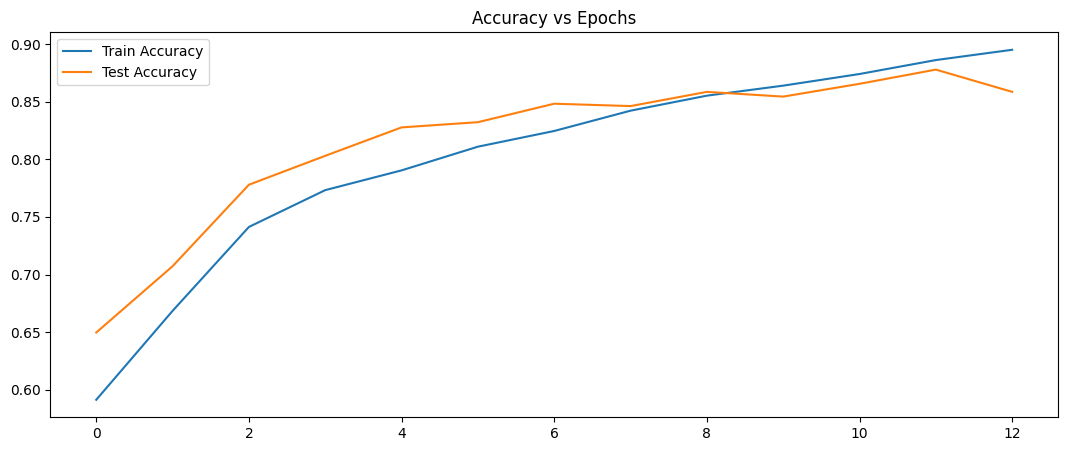

In [ ]:
plt.figure(figsize = (13, 5))
plt.title("Accuracy vs Epochs")
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.legend(loc = 'best')
plt.show()

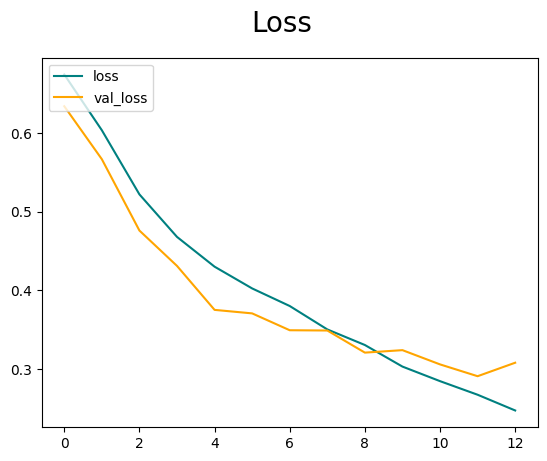

In [1032]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

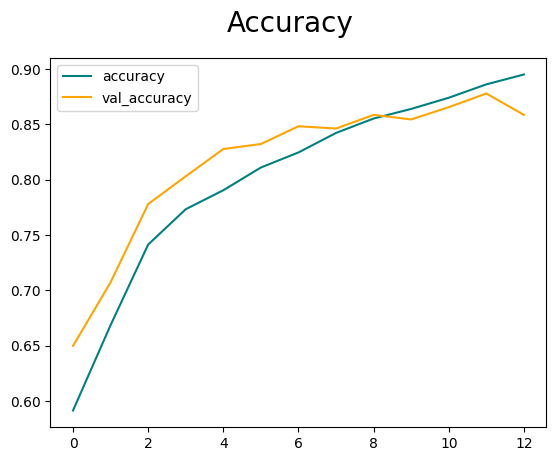

In [1033]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluación

In [1034]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [1035]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [1036]:
print(f'Precision:{ pre.result()}, Recall: {re.result()}, Acurrancy:{acc.result()}')

Precision:0.8363228440284729, Recall: 0.7722567319869995, Acurrancy:0.8419688940048218


In [1037]:
score = model.evaluate(val)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1] * 100, score[0]))

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8660 - loss: 0.2887
Test Accuracy: 85.36%
Test Loss: 0.3165888488292694


# Test

In [ ]:
# Elegir img para test

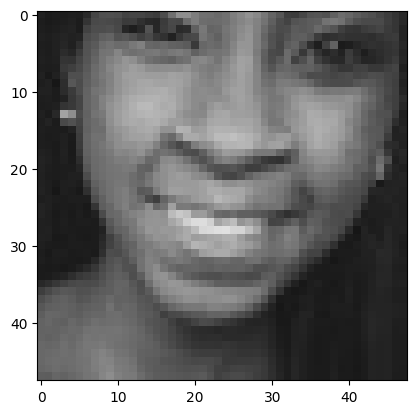

In [39]:
img = cv2.imread('data/happy/35885.jpg')
plt.imshow(img)
plt.show()

In [40]:
resize = tf.image.resize(img, (48, 48))
resize = resize / 255.0

In [46]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


In [47]:
yhat

array([[0.4958438]], dtype=float32)

In [48]:
if yhat >= 0.5: 
    print(f'Prediccion de Clase: Sad ¦ Triste')
else:
    print(f'Prediccion de Clase: Happy ¦ Alegre')

Prediccion de Clase: Happy ¦ Alegre


# Guardar Y Cargar Modelo

In [ ]:
model.save(os.path.join('models','ImageClassifierTest.keras'))

In [ ]:
# Una vez entrenado, ejecutar solo el segundo bloque de "Requisitos" y luego esto 

/Cargar Modelo Aquí/

In [246]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

new_model = load_model('models/ModeloClasificacionv1.keras')

In [328]:
img = cv2.imread('test/happy/PrivateTest_95094.jpg')

In [329]:
resize = tf.image.resize(img, (48, 48))
resize = resize / 255.0
yhat = new_model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [330]:
yhat

array([[0.04765145]], dtype=float32)

In [331]:
if yhat > 0.53: 
    print(f'Prediccion de Clase: Sad ¦ Triste')
else:
    print(f'Prediccion de Clase: Happy ¦ Alegre')

Prediccion de Clase: Happy ¦ Alegre


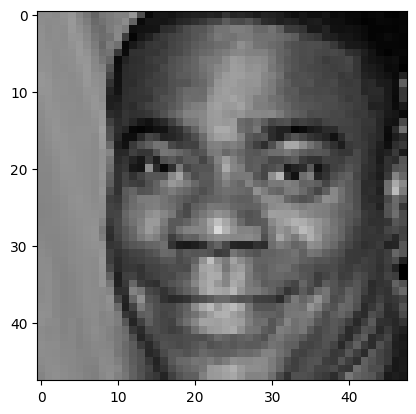

In [332]:
plt.imshow(img)
plt.show()

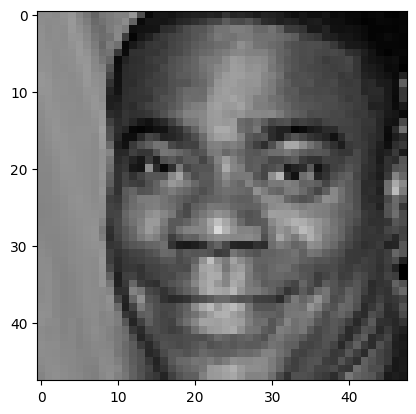

In [333]:
# Correccion de color en imagenes (No afecta aparte de lo visual)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Historial De Pruebas

In [334]:
# Guardamos la mayoria de entrenos hechos para consultarse y comparar si es necesario

In [335]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator

archivo_eventos = 'logs/train/events.out.tfevents.1733555733.LAPTOP-HSAJLOPC.16264.41.v2'

event_acc = event_accumulator.EventAccumulator(archivo_eventos)
event_acc.Reload()

tags = event_acc.Tags()
tags


{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': [],
 'distributions': [],
 'tensors': ['keras', 'epoch_accuracy', 'epoch_loss', 'epoch_learning_rate'],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [336]:
event_acc.Tensors('epoch_loss')

[TensorEvent(wall_time=1733555751.252954, step=1, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "&~\032?"
 ),
 TensorEvent(wall_time=1733555759.864986, step=2, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "\345\235\005?"
 ),
 TensorEvent(wall_time=1733555769.07411, step=3, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "\020\217\357>"
 ),
 TensorEvent(wall_time=1733555778.6143, step=4, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "L-\334>"
 ),
 TensorEvent(wall_time=1733555788.246067, step=5, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "\201\002\316>"
 ),
 TensorEvent(wall_time=1733555814.374854, step=8, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "\007/\251>"
 ),
 TensorEvent(wall_time=1733555822.986695, step=9, tensor_proto=dtype: DT_FLOAT
 tensor_shape {
 }
 tensor_content: "D#\233>"
 ),
 TensorEvent(wall_time=1733555831.607252, step=10, tensor_proto=dtype: DT_FLOAT

In [337]:
accuracies = event_acc.Tensors('epoch_accuracy') 
losses = event_acc.Tensors('epoch_loss')

import pandas as pd 

datos_entrenamiento = pd.DataFrame({ 
    'step': [e.step for e in accuracies], 
    'accuracy': [tf.make_ndarray(e.tensor_proto).item() for e in accuracies], 
    'loss': [tf.make_ndarray(e.tensor_proto).item() for e in losses] 
})

print(datos_entrenamiento)

   step  accuracy      loss
0     1  0.668468  0.603487
1     2  0.741306  0.521941
2     3  0.773261  0.467888
3     4  0.790414  0.430033
4     5  0.810973  0.402363
5     8  0.855263  0.330437
6     9  0.863957  0.303003
7    10  0.874060  0.284490
8    11  0.886161  0.267213
9    12  0.895089  0.247201


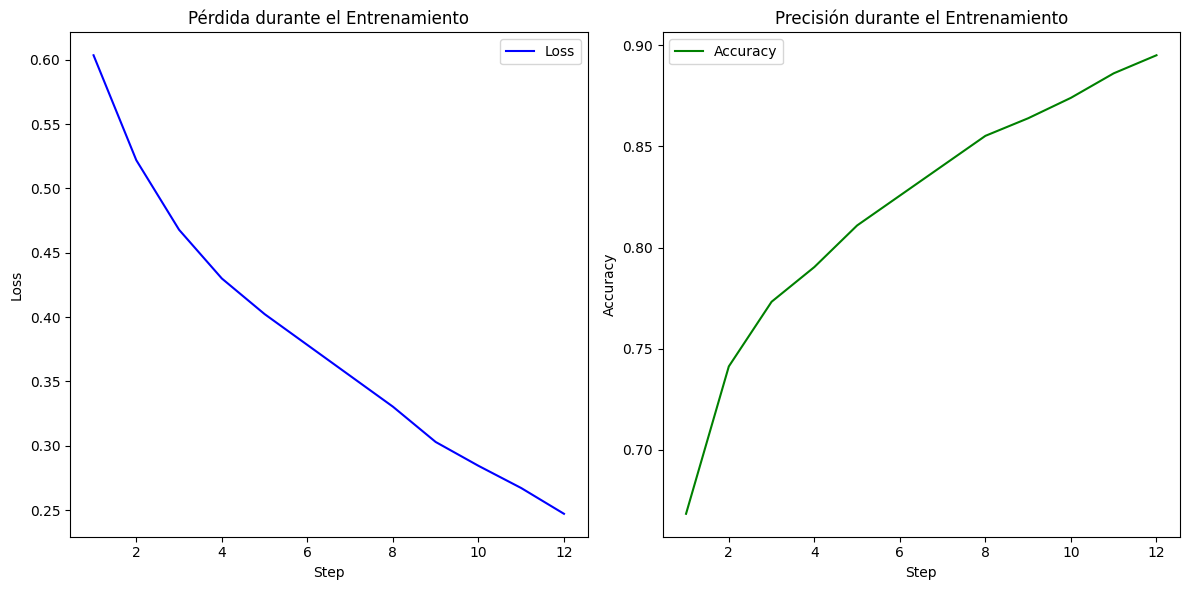

In [338]:
import matplotlib.pyplot as plt

steps = datos_entrenamiento['step']
loss = datos_entrenamiento['loss']
accuracy = datos_entrenamiento['accuracy']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(steps, loss, color='blue', label='Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(steps, accuracy, color='green', label='Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Precisión durante el Entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()
